#### WHAN classification

There are 1221 dwarf galaxies in our samples. To identify quenched, low-mass galaxy candidates from our sample of dwarf galaxies. we therefore use the width of $H\alpha$ vs. $N_{ii}$ line strength diagnostic (WHAN, Cid Fernandes et al. 2011). This allows for the separation of emission due to star formation and AGN, from that originating from hot, evolved stars. The flux ratio between $N_{ii}$ and $H\alpha$ is used to separate AGN activity from star formation for galaxies with $EWH\alpha < 3\mathring{A}$.

- Pure star forming galaxies: $log{[N_{ii}]} < -0.4$ and $EWH\alpha > 3\mathring{A}$
- Strong AGN (i.e., Seyferts): $log{[N_{ii}]} > -0.4$ and $EWH\alpha > 6\mathring{A}$
- Weak AGN: $log{[N_{ii}]} > -0.4$ and $3\mathring{A} < EWH\alpha < 6\mathring{A}$
- Retired galaxies (i.e., fake AGN): $0.5 < EWH\alpha < 3\mathring{A}$.
- Passive galaxies (actually, line-less galaxies): $EWH\alpha < 0.5\mathring{A}$ or $EWN_{ii} < 0.5$


- [SDSS WHAN classification tutorial](https://sdss-marvin.readthedocs.io/en/latest/tutorials/exercises/marvin_whan_solution.html)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from marvin import config
config.setDR('DR16')

from marvin.tools.maps import Maps
import marvin.utils.plot.map as mapplot

[INFO]: No release version set. Setting default to DR15


In [2]:
df = pd.read_csv('marvin_GOOD_table.csv')
plateifus = df['plateifu']
absmag_r = df['elpetro_absmag_r']
logmass = df['elpetro_logmass']
error_target = ['7443-3703', '8993-1901', '8158-3703', '8309-3703', '9025-12702']

# for i in range( 0, len(plateifus) ):
#     try:
#         maps = Maps(plateifu = plateifus[i], mode = 'local')
#     except:
#         error_target.append( plateifus[i] )
#         print( plateifus[i] )
#         continue

In [3]:
M_r = []
for target in range(1, len(absmag_r)) :
    if absmag_r[target] != np.inf:
        M_r.append(absmag_r[target])

print( np.max(M_r) )
print( np.min(M_r) )
print( np.std(M_r) )
print( np.mean(M_r) )
print( '%e' %(10**np.median(logmass) ) )

-11.1597023010254
-18.9931030273438
0.6809978512014783
-17.804530142178226
2.076365e+09


In [4]:
df = pd.read_csv('test.csv')
colours = df['nsa.elpetro_mag_u_r']
u_r = []

for target in range(1, len(colours)) :
    if colours[target] != np.inf:
        u_r.append(colours[target])

print( np.max(u_r) )
print( np.min(u_r) )
print( np.std(u_r) )
print( np.mean(u_r) )

4.26880940660433
-0.33473432429502
0.4512692129141291
1.8008773146731551


In [5]:
psf = []  # Pure star forming galaxies
sagn = [] # Strong AGN
wagn = [] # Weak AGN
rg = []   # Retired Galaxies
pg = []   # Passive Galaxies
x_logniiha = []
y_ewha = []
def whan_classification( maps ):
    
    ewha  = np.nanmean( np.where( maps['emline_sew_ha_6564'].value >= 0, maps['emline_sew_ha_6564'].value, np.nan ) )
    ewnii = np.nanmean( np.where( maps['emline_sew_nii_6585'].value >= 0, maps['emline_sew_nii_6585'].value, np.nan ) )

    nii = np.nanmean( np.where( maps.emline_gflux_nii_6585.value >= 0, maps.emline_gflux_nii_6585.value, np.nan ) )
    ha  = np.nanmean( np.where( maps.emline_gflux_ha_6564.value >= 0, maps.emline_gflux_ha_6564.value, np.nan ) )
    logniiha = np.log10( nii/ha )
    
    x_logniiha.append( logniiha )
    y_ewha.append( ewha )
    
    if logniiha < -0.4 and ewha > 3:
        psf.append(maps.plateifu)
    elif logniiha > -0.4 and ewha > 6:
        sagn.append(maps.plateifu)
    elif logniiha > -0.4 and ( ewha > 3 and ewha < 6 ) :
        wagn.append(maps.plateifu)
    elif ewha > 0.5 and ewha < 3:
        rg.append(maps.plateifu)
    elif ewha < 0.5 or ewnii < 0.5:
        pg.append(maps.plateifu)
    
    return psf, sagn, wagn, rg, pg

In [6]:
for plateifu in plateifus:
    if plateifu not in error_target:
        maps = Maps( plateifu = plateifu, mode='local' )
        psf, sagn, wagn, rg, pg = whan_classification(maps)

In [7]:
print( len(psf) )
print( len(sagn) )
print( len(wagn) )
print( len(rg) )
print( len(pg) )
print( len(psf) + len(sagn) + len(wagn) + len(rg) + len(pg) )

781
16
42
243
139
1221


In [8]:
for plateifu in plateifus:
    if ( plateifu not in error_target and 
         plateifu not in psf and
         plateifu not in sagn and
         plateifu not in wagn and
         plateifu not in rg and
         plateifu not in pg ):
        print( plateifu )

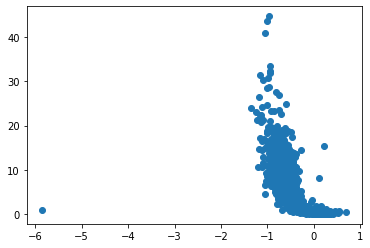

In [9]:
plt.scatter(x_logniiha, y_ewha )

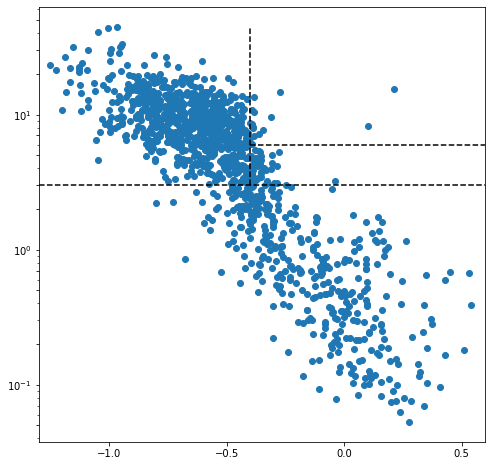

In [10]:
from matplotlib.ticker import FormatStrFormatter
plt.figure( figsize=(8,8))
plt.axhline(y=3, color='black', linestyle='--')
plt.vlines(x=-0.4, ymin=3, ymax=np.max(y_ewha), color='black', linestyle='--')
plt.hlines(y=6, xmin=-0.4, xmax=np.max(x_logniiha), color='black', linestyle='--')

plt.yscale('log')
plt.xlim(-1.3, 0.6)
plt.xticks( [-1.0, -0.5, 0, 0.5] )
plt.yticks( [0.05, 0.1, 0.2, 0.5, 0.7, 1, 2, 3, 5, 7, 10, 20, 30, 50, 70, 100, 200, 300])

plt.scatter(x_logniiha, y_ewha )
plt.savefig('WHAN.png', dpi=600)

In [12]:
pg_rg_data = {"plateifus": pg + rg}
pg_rg_data_df = pd.DataFrame(pg_rg_data)
pg_rg_data_df.to_csv("pg_rg.csv")
